In [15]:
import argparse  # 导入命令行参数解析库
import torch  # 导入PyTorch库
from torch.utils.data import DataLoader
import torch.nn as nn  # 导入神经网络模块
import torch.nn.functional as F  # 导入常用的功能性神经网络操作
import torch.optim as optim  # 导入优化器模块
from torchvision import datasets, transforms  # 导入数据集和转换工具
from torch.optim.lr_scheduler import StepLR  # 导入学习率调度器

from typing import Tuple
from main import Net as MinstModel
import matplotlib.pyplot as plt


# 设置数据加载器的参数
train_kwargs = {'batch_size': 64}
test_kwargs = {'batch_size': 1000}

# 数据转换
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # 数据归一化
])


# 创建模型实例
model: nn.Module = MinstModel()

# 从文件加载模型
model.load_state_dict(torch.load("mnist_cnn.pt"))  # 加载模型参数
model.eval()  # 设置模型为评估模式


# 加载MNIST数据集
dataset1 = datasets.MNIST('../data', train=True, download=True,
                          transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                          transform=transform)
train_loader = DataLoader(dataset1, **train_kwargs)
test_loader: DataLoader[Tuple[str, str]] = DataLoader(dataset2, **test_kwargs)



/tmp/ipykernel_40190/419398341.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("mnist_cnn.pt"))  # 加载模型参数


In [22]:
test_loss = 0  # 初始化测试损失
correct = 0  # 初始化正确预测的数量
incorrect_images = []  # 存储错误预测的图像
incorrect_preds = []  # 存储错误预测的结果
correct_labels = []  # 存储正确标签

for data, target in test_loader:  # 遍历测试数据加载器
    output = model(data)  # 前向传播，获取模型输出
    test_loss += F.nll_loss(output, target, reduction='sum').item()  # 计算负对数似然损失并累加
    pred = output.argmax(dim=1, keepdim=True)  # 获取每个样本输出概率最大的类别索引作为预测结果

    # 统计正确预测的数量
    correct += pred.eq(target.view_as(pred)).sum().item()  

    # 判断预测是否正确
    for i in range(data.size(0)):  # 遍历当前批次的每个样本
        if pred[i] != target[i]:  # 如果预测错误
            incorrect_images.append(data[i])  # 存储错误的图像
            incorrect_preds.append(pred[i].item())  # 存储错误的预测结果
            correct_labels.append(target[i].item())  # 存储正确的标签

# 处理完所有数据后，可以查看错误预测的信息
print(f'Number of correct predictions: {correct}')
print(f'Number of incorrect predictions: {len(incorrect_images)}')

Number of correct predictions: 9917
Number of incorrect predictions: 83


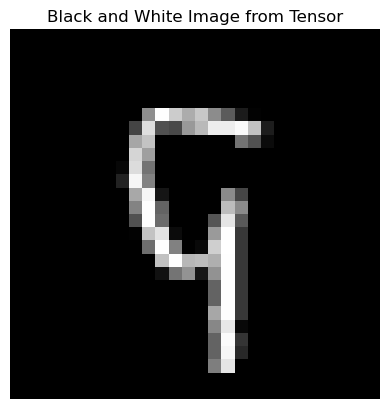

5 9


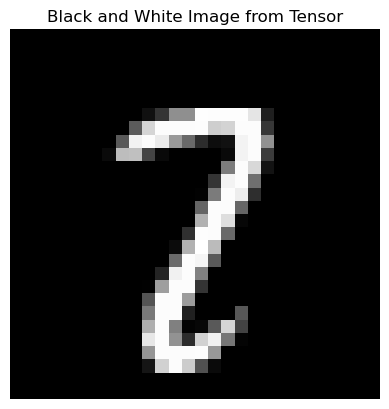

7 2


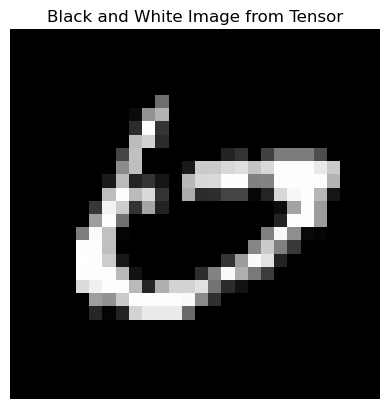

0 6


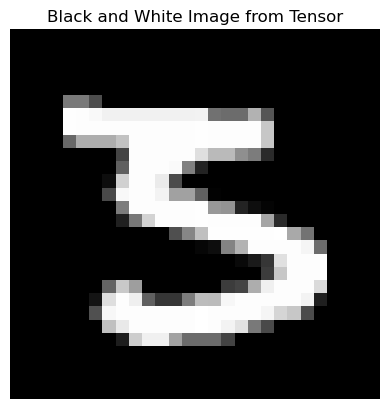

5 3


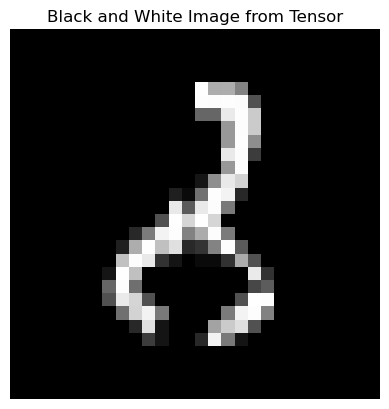

2 8


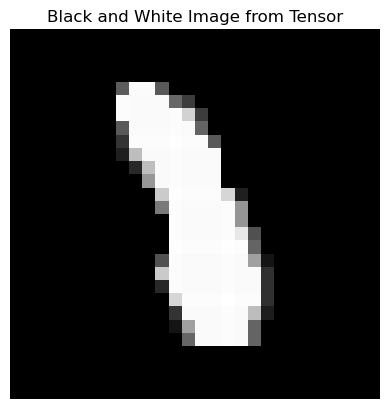

8 1


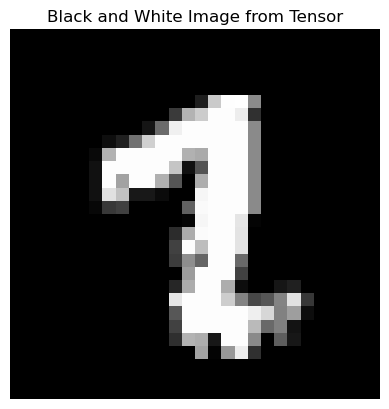

1 2


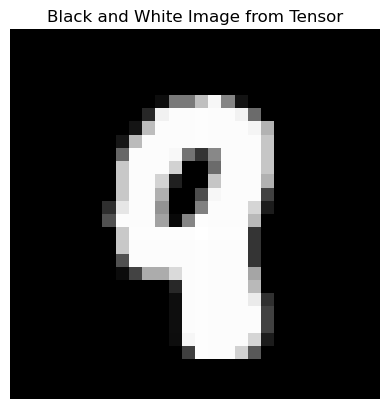

9 8


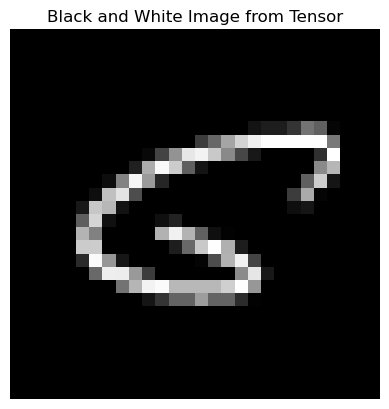

5 6


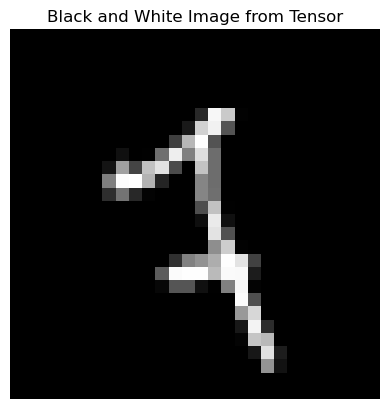

3 7


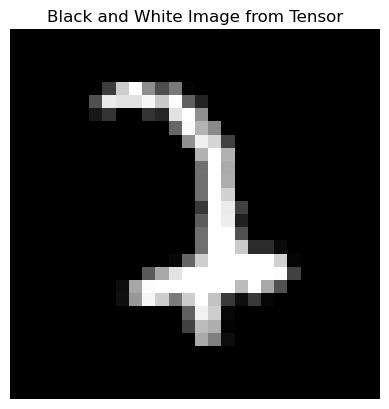

2 7


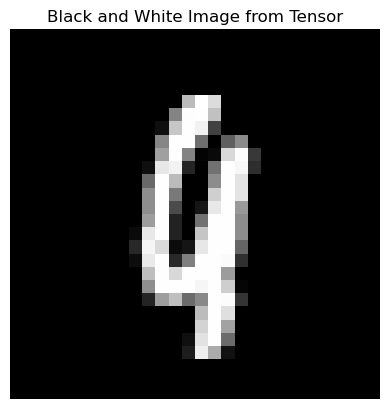

4 9


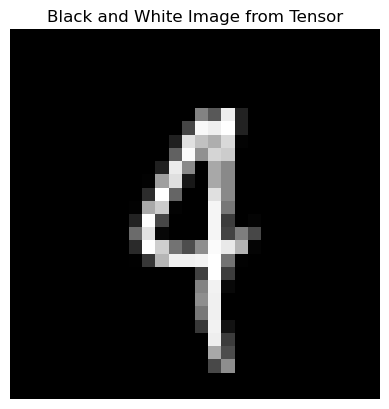

9 4


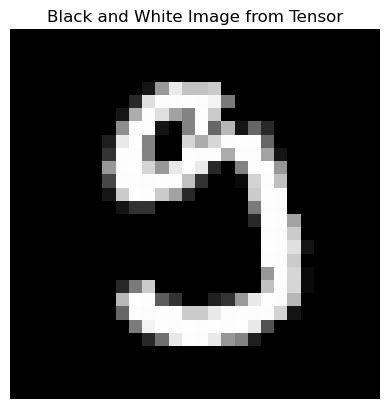

5 9


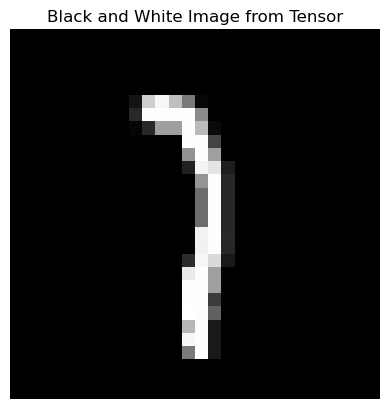

1 7


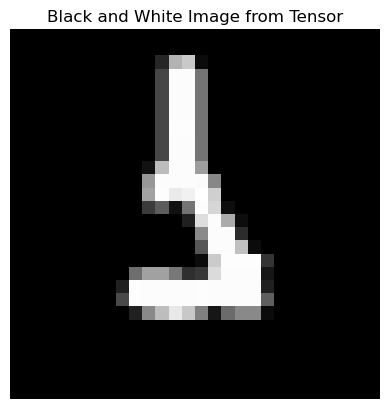

5 1


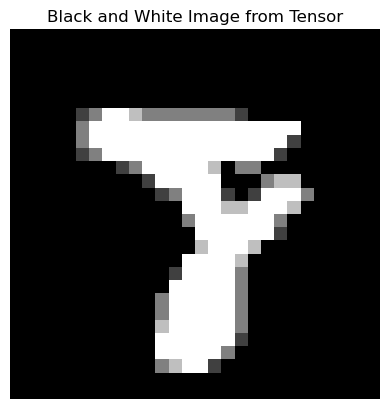

7 8


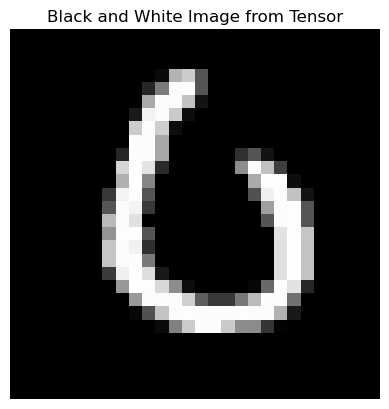

6 0


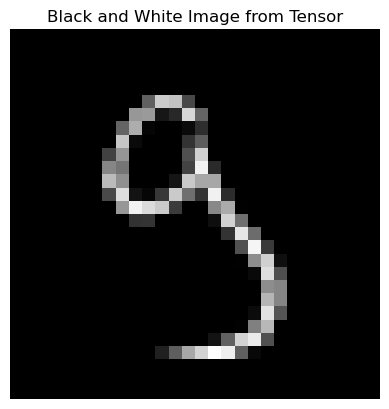

5 9


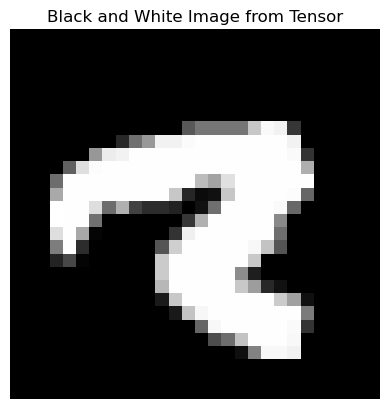

7 2


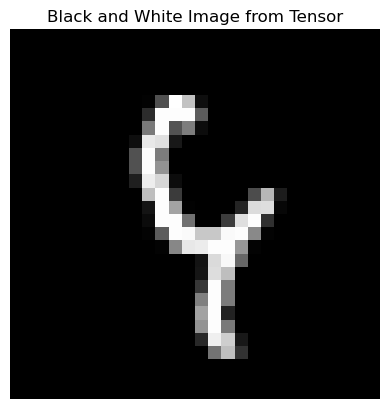

4 9


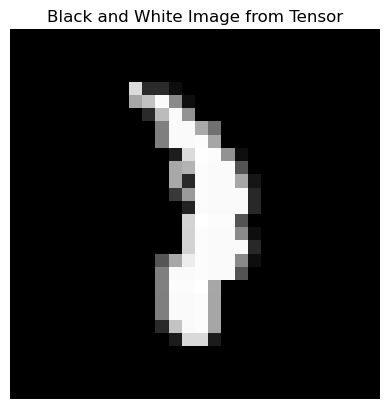

2 1


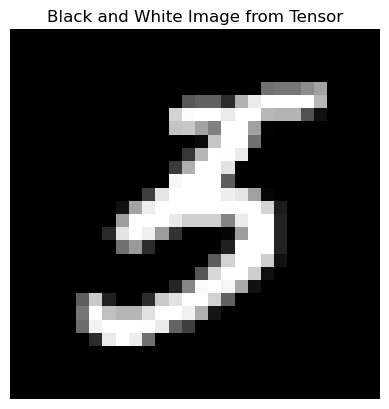

3 5


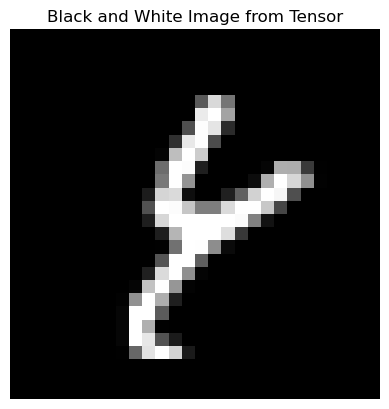

8 4


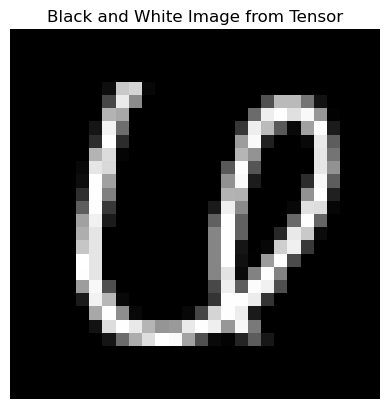

0 6


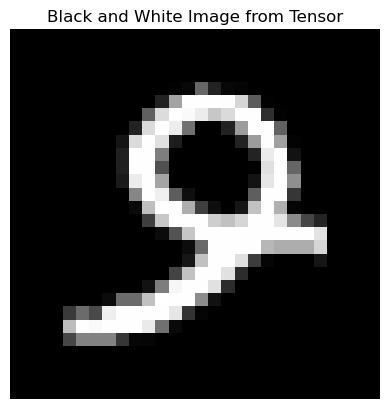

8 9


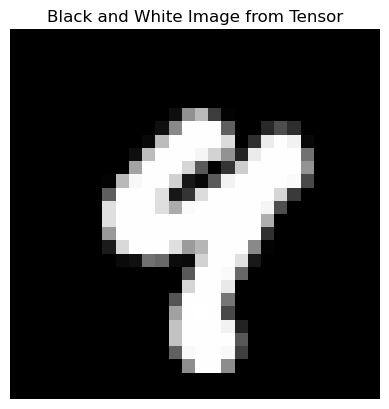

9 4


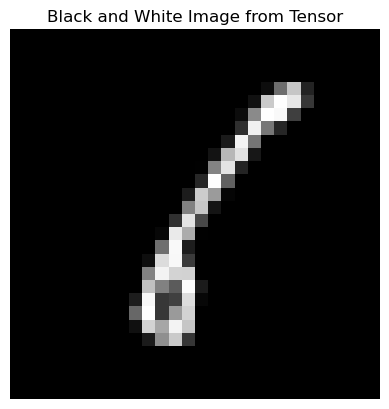

1 6


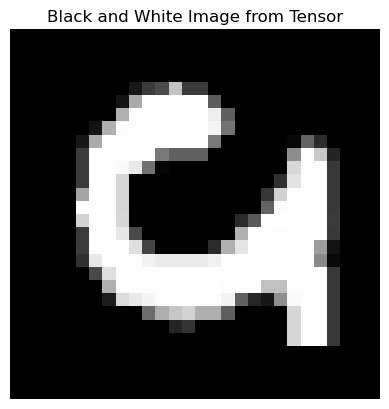

0 9


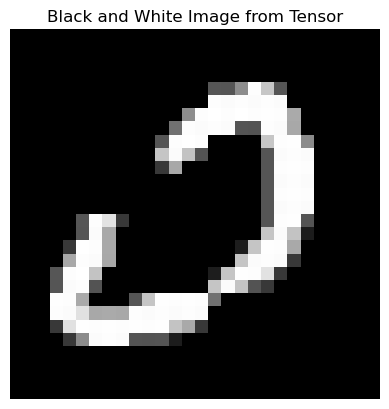

2 0


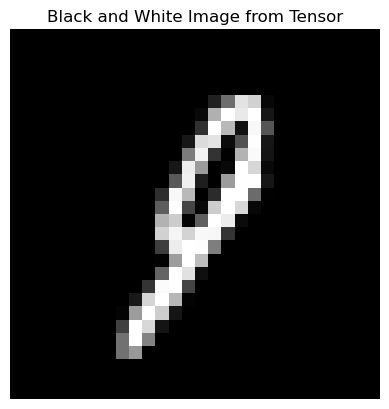

4 9


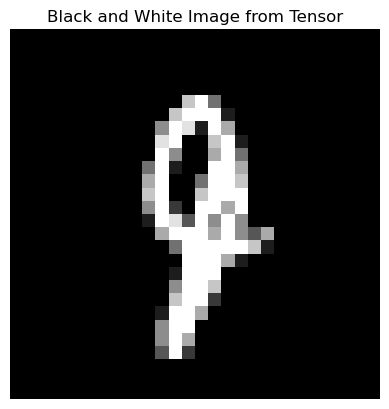

4 9


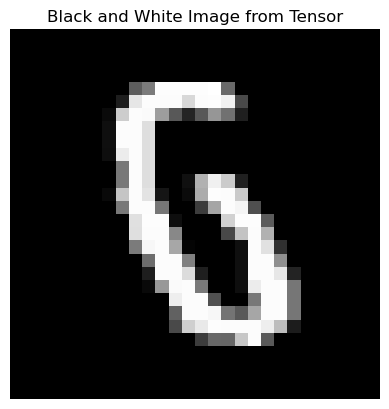

5 6


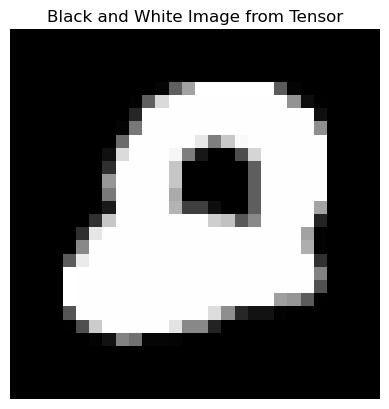

0 2


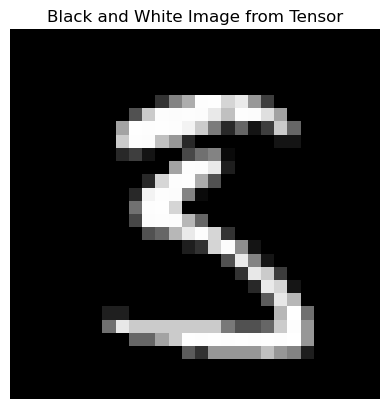

3 5


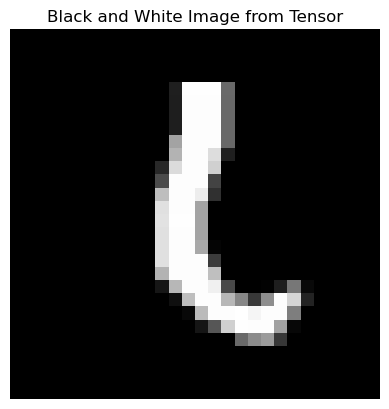

1 6


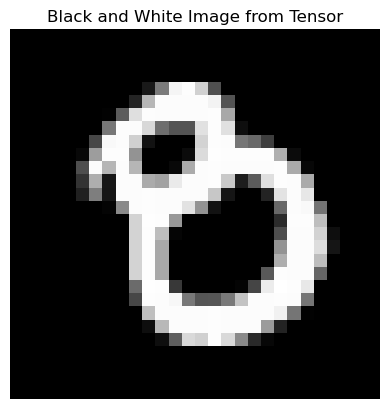

0 8


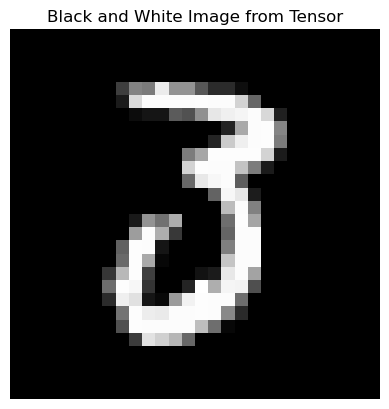

2 3


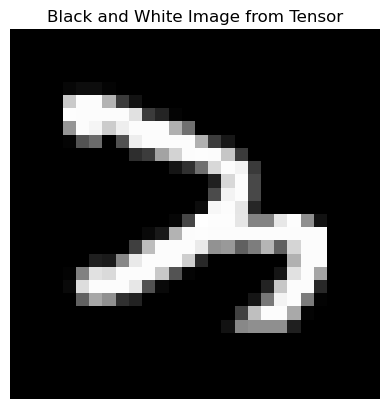

7 3


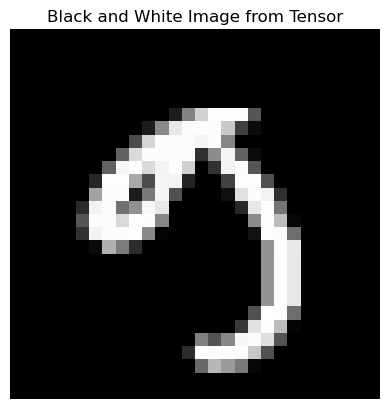

5 9


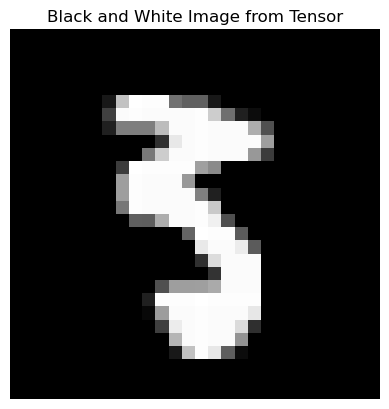

5 3


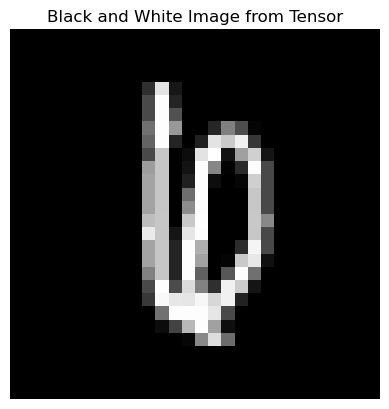

0 6


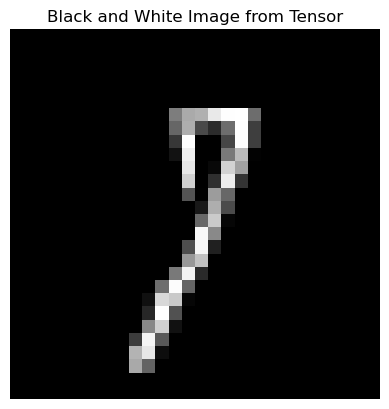

9 7


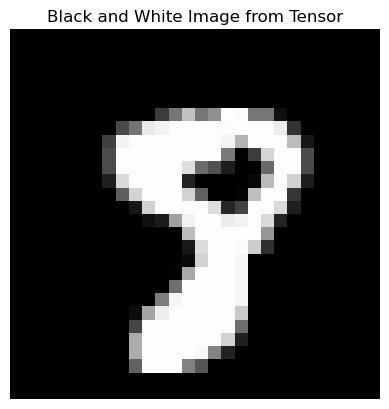

9 8


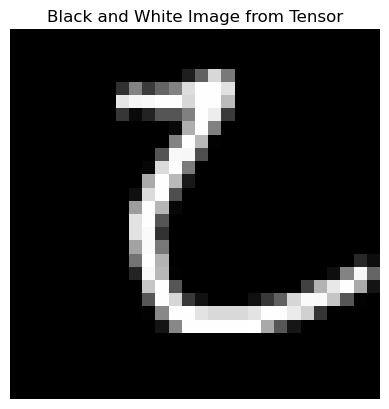

6 2


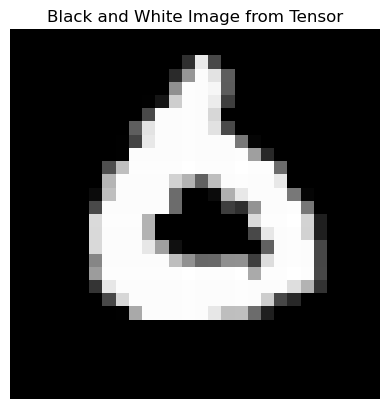

0 6


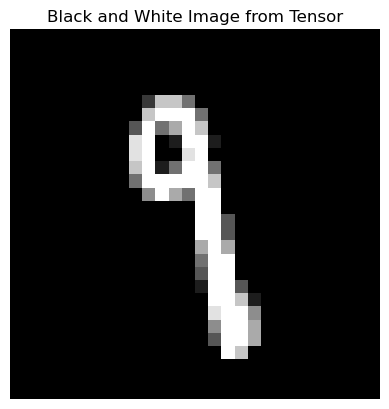

1 9


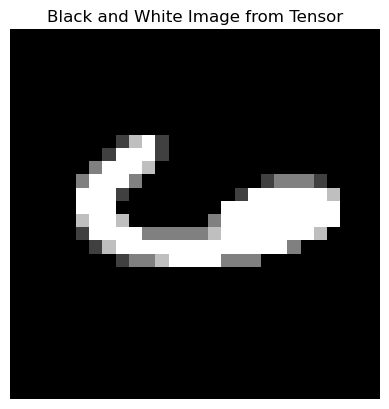

4 6


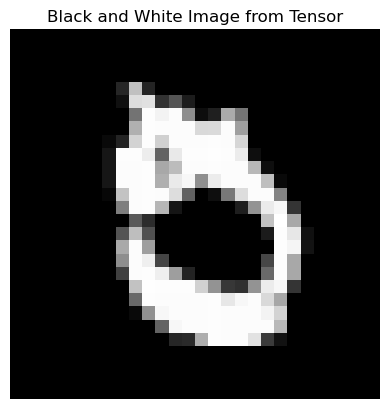

0 5


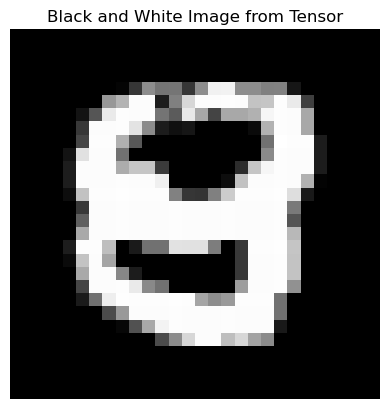

9 8


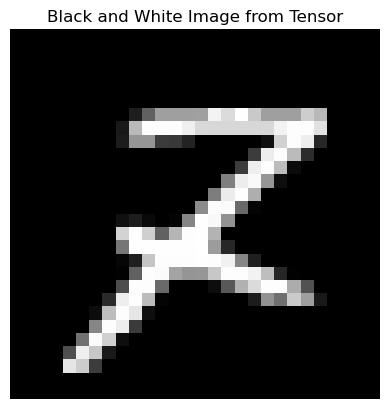

2 7


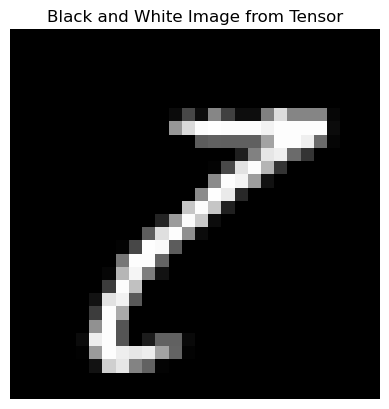

8 7


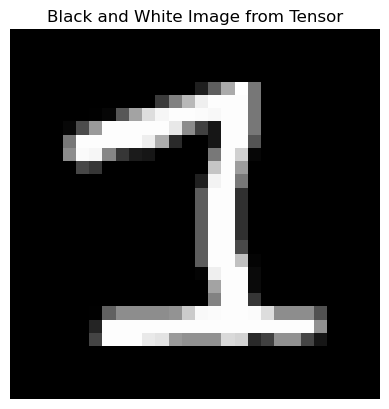

3 1


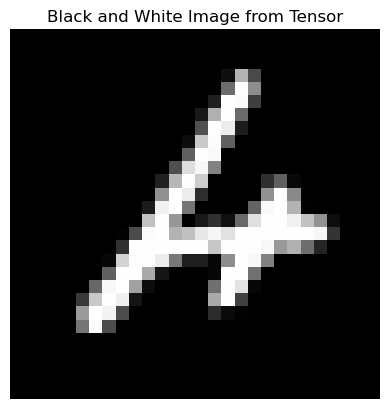

6 4


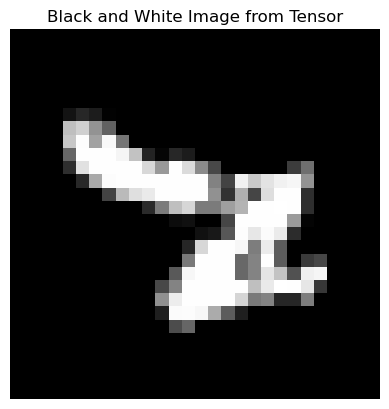

7 2


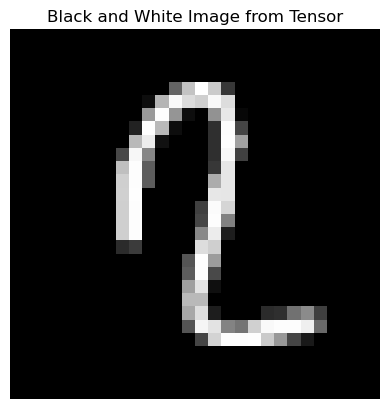

1 2


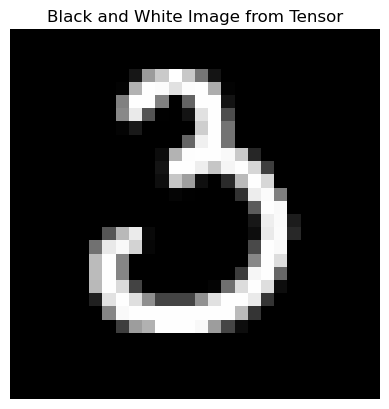

2 3


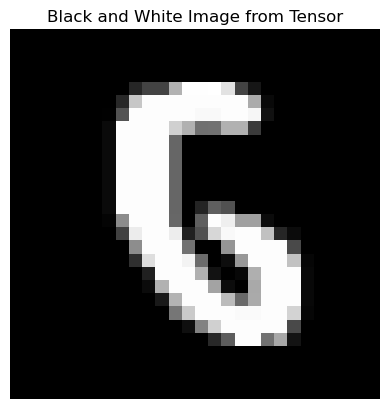

5 6


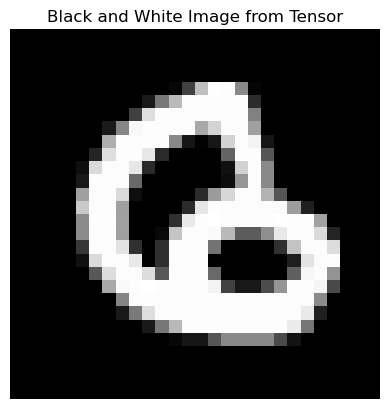

8 6


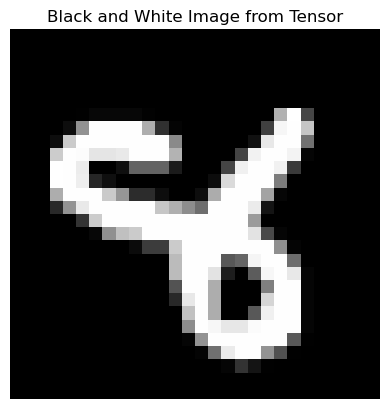

4 8


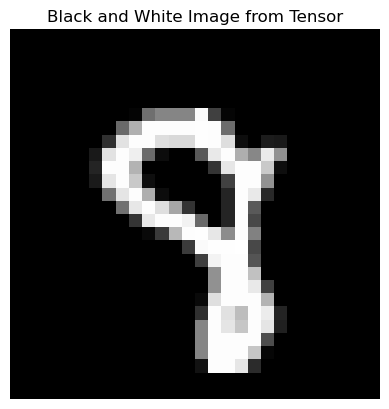

9 8


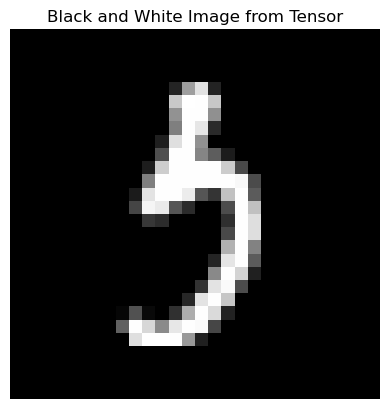

5 3


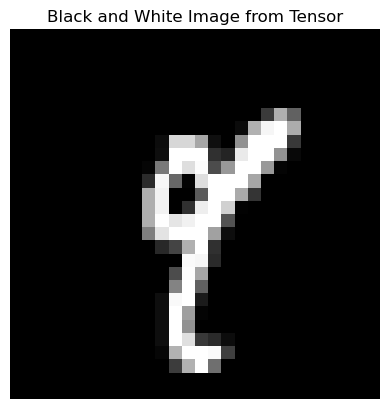

8 9


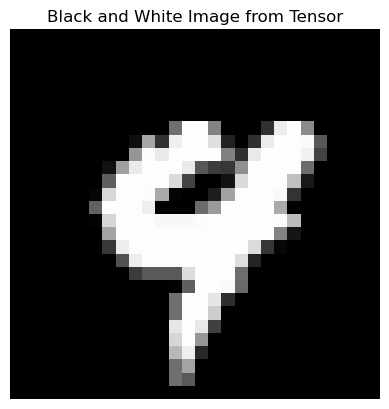

9 4


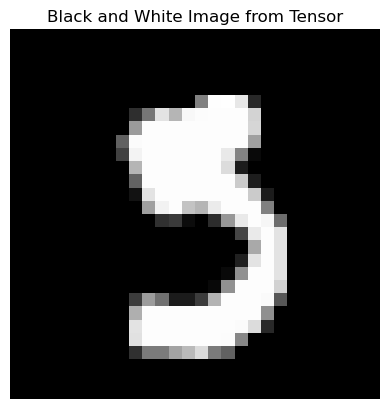

3 5


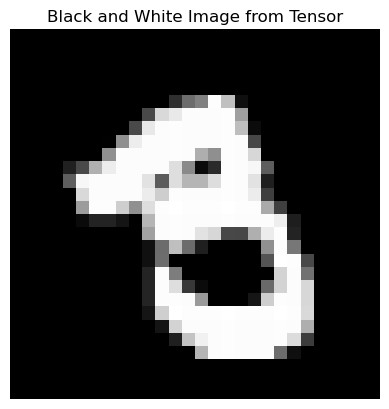

8 3


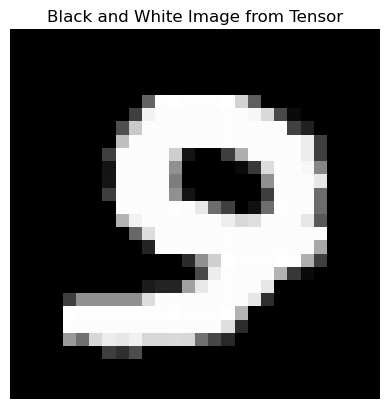

5 9


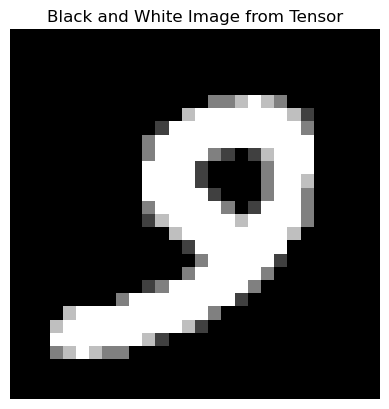

3 9


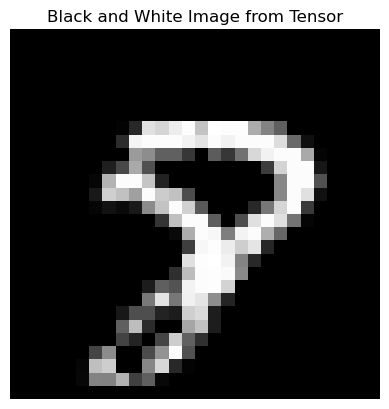

9 8


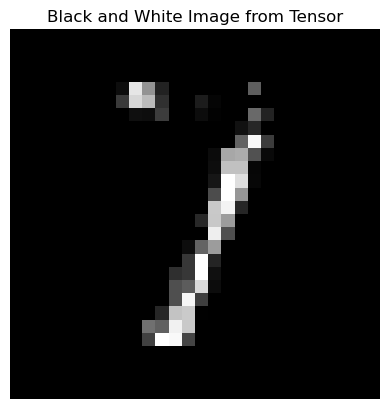

1 7


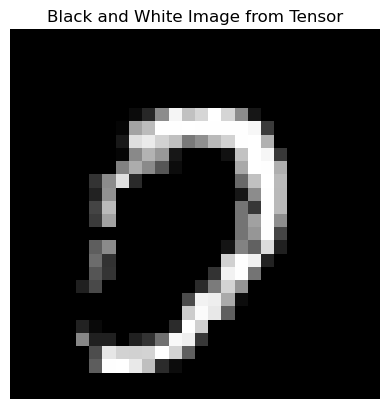

7 0


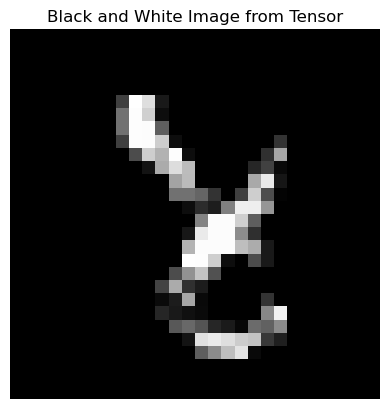

2 8


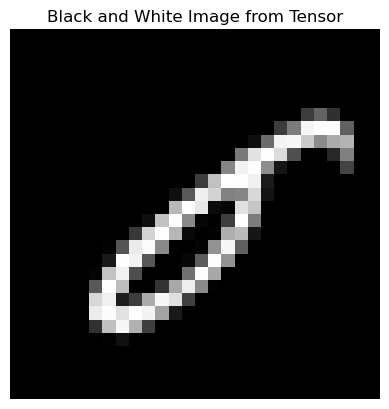

8 0


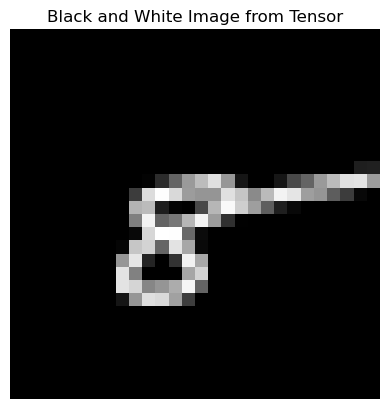

5 8


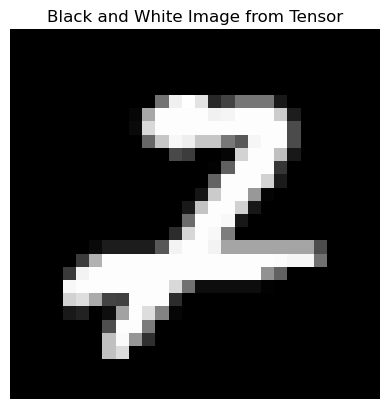

2 7


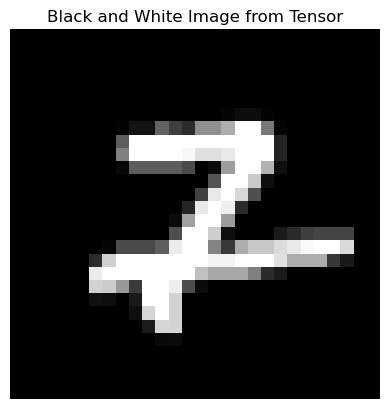

2 7


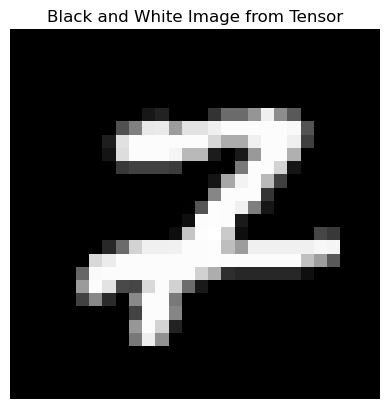

2 7


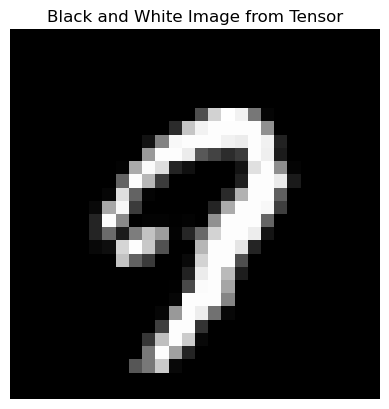

7 9


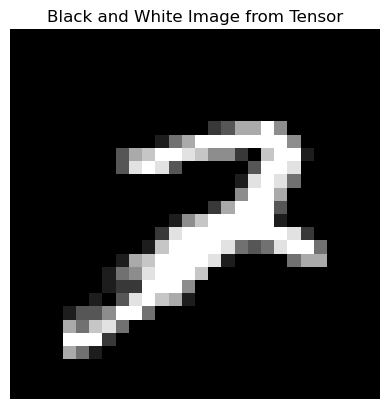

7 2


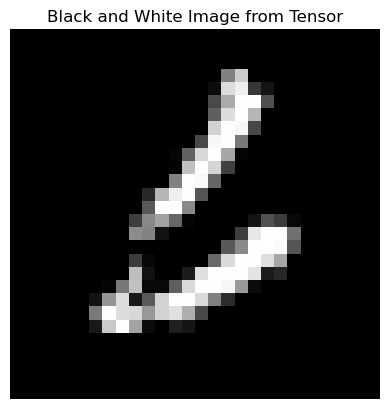

3 6


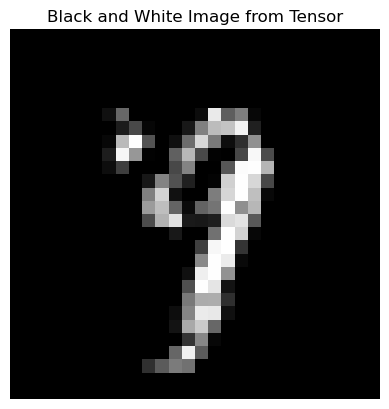

7 9


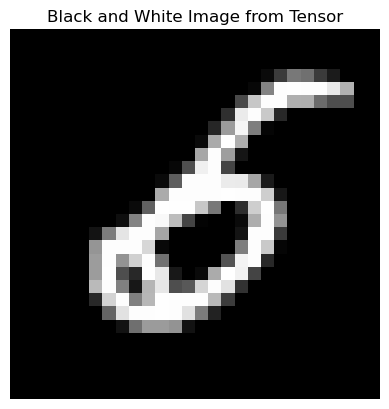

6 5


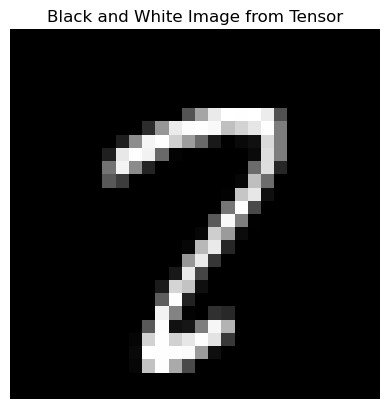

7 2


In [25]:
for i in range(83):
  # 显示黑白图像
  # 计算最小值和最大值
  min_val = incorrect_images[i].min()
  max_val = incorrect_images[i].max()

  # 进行归一化
  normalized_tensor = (incorrect_images[i] - min_val) / (max_val - min_val)


  plt.imshow(normalized_tensor.reshape((28,28)), cmap='gray')  # 使用灰度色图显示图像
  plt.axis('off')  # 不显示坐标轴
  plt.title('Black and White Image from Tensor')  # 设置标题
  plt.show()  # 显示图形
  print(incorrect_preds[i], correct_labels[i])

In [8]:
data.shape

torch.Size([1000, 1, 28, 28])

In [9]:
target.shape

torch.Size([1000])

In [10]:
data[0]

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

In [12]:
torch.max(data)

tensor(2.8215)

In [13]:
torch.min(data)

tensor(-0.4242)

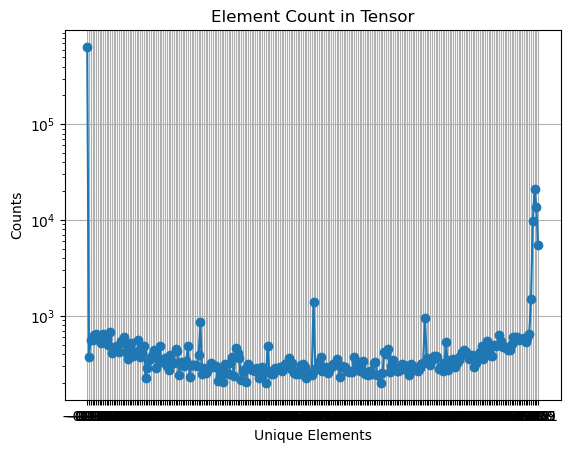

In [21]:
# 统计元素出现的次数
unique_elements, counts = torch.unique(data, return_counts=True)

# 将结果转换为 NumPy 数组，以便使用 Matplotlib 绘图
unique_elements = unique_elements.numpy()
counts = counts.numpy()

# 绘制折线图
plt.plot(unique_elements, counts, marker='o')  # 使用圆点标记数据点
plt.title('Element Count in Tensor')  # 设置标题
plt.xlabel('Unique Elements')  # 设置 x 轴标签
plt.ylabel('Counts')  # 设置 y 轴标签
plt.xticks(unique_elements)  # 设置 x 轴刻度

# 设置 y 轴为对数刻度
plt.yscale('log')


plt.grid()  # 显示网格
plt.show()  # 显示图形


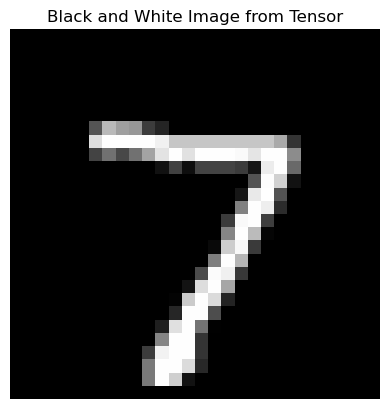

In [20]:
# 显示黑白图像
plt.imshow(data[0].reshape((28,28)), cmap='gray')  # 使用灰度色图显示图像
plt.axis('off')  # 不显示坐标轴
plt.title('Black and White Image from Tensor')  # 设置标题
plt.show()  # 显示图形


In [36]:
data[0].shape # 1 28 28
torch.cat((data[0],data[1])).shape # 2, 28, 28
torch.cat((data[0],data[1]), dim=1).shape # 1, 56, 28 
torch.cat((data[0],data[1]), dim=-1).shape # 1, 28, 56 只是倒着数

IndexError: Dimension out of range (expected to be in range of [-3, 2], but got -1111)

In [34]:
a = torch.tensor((1,2,3,4))
a.shape
torch.cat((a,a,a), dim=1)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

tensor([1, 2, 3, 4])